In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
def save_notebook():
    return display(Javascript("IPython.notebook.save_notebook()"),
                   include=['application/javascript'])

def output_HTML(read_file, output_file):
    from nbconvert import HTMLExporter
    import codecs
    import nbformat
    exporter = HTMLExporter()
    # read_file is '.ipynb', output_file is '.html'
    output_notebook = nbformat.read(read_file, as_version=4)
    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(output_file, 'w', encoding='utf-8').write(output)

In [4]:
import sys, os
sys.path.append('../')

from rankutils.mappings import ranking_type_map
from rankutils.cfgloader import cfgloader
from rankutils.evaluation import Evaluator
from rankutils.drawing import colors_from_cmap, irp_results_barh_draw, irp_results_pos_draw, rpp_results_draw

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import seaborn as sns
sns.set()

from tqdm import tqdm

import mpld3

In [5]:
pathcfg = cfgloader("/home/alberto/phD/projects/performance_prediction/ret-mr-learning/source/path_2.cfg")
barfigsize=(20, 8)
linefigsize=(15, 15)
titleargs=dict(fontsize=14, horizontalalignment='center')

# Eval K = 10

In [6]:
evalcfgfile = "/home/alberto/phD/projects/performance_prediction/ret-mr-learning/source/evalcfg/eval_JVCI_2018.cfg"

keys = ['oxford_001', 'unicamp_001', 
        'places365_001', 'places365_002', 
        'vggfaces_001', 'vggfaces_002', 
        'imagenet_001', 'imagenet_004']

evaluators = dict()
aliases = dict(oxford_001='OXF SURF2000-Votes', unicamp_001='UNI SURF2000-Votes',
               places365_001='P365 VGG16-L2Sq', places365_002='P365 R152-L2Sq',
               places365_003='P365 VGG16-Cos', vggfaces_001='VGGF VGG16-L2Sq',
               vggfaces_002='VGGF VGG16-L2Sq + Pert', vggfaces_003='VGGF VGG16-Cos',
               imagenet_001='INET Rv2-L2Sq', imagenet_002='INET Rv2-Cos',
               imagenet_004='INET Rv2-Canb', imagenet_003='INET Rv2-Cheb')

for i in tqdm(range(len(keys)), desc='Evaluating ', total=len(keys)):
    k = keys[i]
    evaluators[k] = Evaluator(evalcfgfile=evalcfgfile, key=k, pathcfg=pathcfg)
    evaluators[k].evaluate()

Evaluating : 100%|██████████| 8/8 [00:20<00:00,  2.75s/it]


## Positional nACC

[0.5539 0.5599 0.553  0.5578 0.5622 0.5582 0.5585 0.5594 0.5555 0.5562]
[0.5786 0.5571 0.5517 0.5548 0.5566 0.5533 0.5573 0.5552 0.5474 0.5497]
[0.5638 0.5578 0.5437 0.5533 0.5566 0.555  0.5549 0.5426 0.5497 0.5534]
[0.5657 0.5565 0.5409 0.5546 0.5559 0.5555 0.5577 0.5462 0.5519 0.5543]


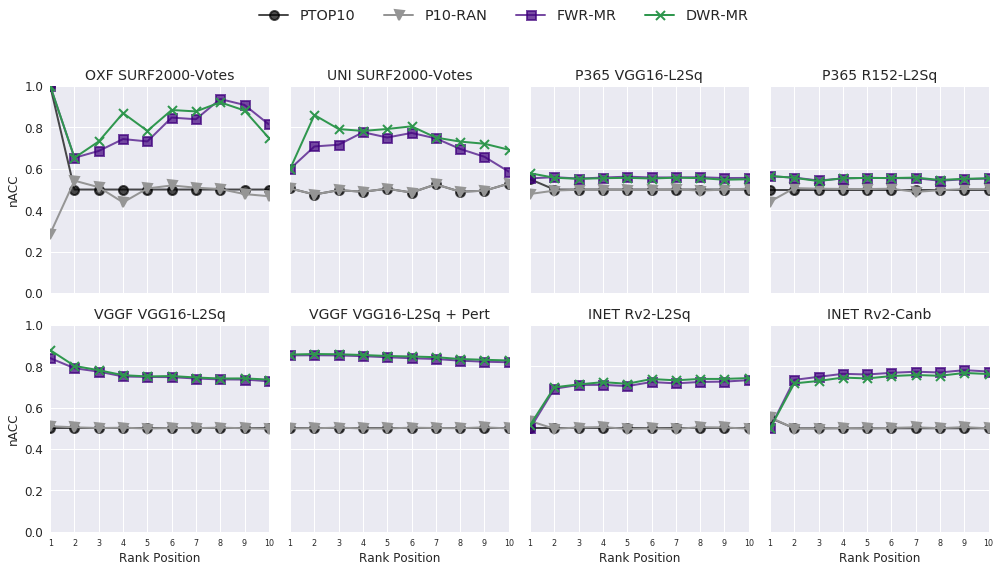

In [7]:
fig, axes = plt.subplots(2, 4, sharey=True, sharex=True)
axes = axes.reshape(-1)
#axes = [axes]
fig.set_size_inches((14, 8))

for i, key in enumerate(keys):
    axes[i].set_title("{0:s}".format(aliases[key]),
                      fontdict=titleargs)
    
    # Shared y axis labels
    if i % 4 == 0:
        yl = 'nACC'
    else:
        yl = None
        
    # Shared x axis labels
    if i >= 4:
        xl = 'Rank Position'
    else:
        xl = None
    
    h, l = irp_results_pos_draw(evaluators[key].data, evaluators[key].k, ax=axes[i], measure = 'NACC', 
                                xlabel=xl, ylabel=yl)
    
    if i == len(keys)-1:
        fig.legend(h, l, fancybox=True, shadow=True, loc='upper center', bbox_to_anchor=[0.5, 1.0], ncol=4,
                  fontsize='x-large')

print(evaluators['places365_001'].data[2]['pos_evaluation_nacc'][-1])
print(evaluators['places365_001'].data[3]['pos_evaluation_nacc'][-1])        
print(evaluators['places365_002'].data[2]['pos_evaluation_nacc'][-1])        
print(evaluators['places365_002'].data[3]['pos_evaluation_nacc'][-1])        

fig.tight_layout()
plt.subplots_adjust(top=0.85)
fig.savefig('/home/alberto/Dropbox/2018-Elsevier-JVCI-Weibull Relevance Prediction/major/figures/JVCI_2018_Pos-NACC_k10.pdf')

## RPP nACC

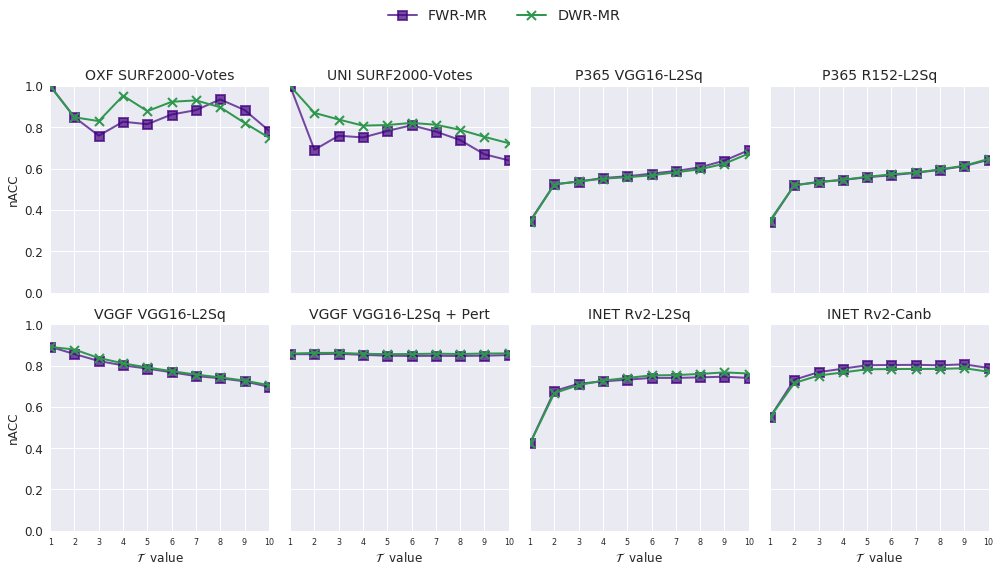

In [8]:
fig, axes = plt.subplots(2, 4, sharey=True, sharex=True)
axes = axes.reshape(-1)
#axes = [axes]
fig.set_size_inches((14, 8))

for i, key in enumerate(keys):
    axes[i].set_title("{0:s}".format(aliases[key]),
                      fontdict=titleargs)
    
    # Shared y axis labels
    if i % 4 == 0:
        yl = 'nACC'
    else:
        yl = None
        
    # Shared x axis labels
    if i >= 4:
        xl = '$\mathcal{T}$  value'
    else:
        xl = None
    
    data = [evaluators[key].data[-2], evaluators[key].data[-1]]
    h, l = rpp_results_draw(data, evaluators[key].k, ax=axes[i], xlabel=xl, ylabel=yl)
    
    if i == len(keys)-1:
        fig.legend(h, l, fancybox=True, shadow=True, loc='upper center', bbox_to_anchor=[0.5, 1.0], ncol=2,
                  fontsize='x-large')

fig.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('/home/alberto/Dropbox/2018-Elsevier-JVCI-Weibull Relevance Prediction/major/figures/JVCI_2018_rpp_k10.pdf')

## MCC

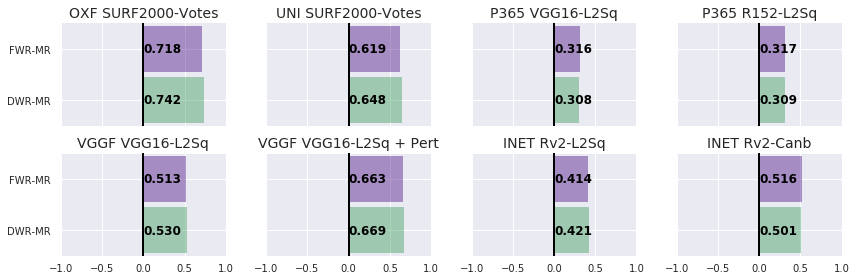

In [9]:
fig, axes = plt.subplots(2, 4, sharey=True, sharex=True)
axes = axes.reshape(-1)
# axes = [axes]
fig.set_size_inches((12, 4))

for i, key in enumerate(keys):
    axes[i].set_title("{0:s}".format(aliases[key]),
                      fontdict=titleargs)
    data = [evaluators[key].data[-2], evaluators[key].data[-1]]
    #irp_results_barh_draw(evaluators[key].data, 'MCC', ax=axes[i])
    irp_results_barh_draw(data, 'MCC', ax=axes[i])
    
fig.tight_layout()

plt.savefig('/home/alberto/Dropbox/2018-Elsevier-JVCI-Weibull Relevance Prediction/major/figures/JVCI_2018_MCC_k10.pdf')

---
# Var K eval

In [10]:
evalcfgfile = "/home/alberto/phD/projects/performance_prediction/ret-mr-learning/source/evalcfg/eval_JVCI_2018_kvar.cfg"

keys = ['places365_001', 'vggfaces_001', 'imagenet_001']

evaluators_k10 = dict()
evaluators_k20 = dict()
evaluators_k30 = dict()

for i in tqdm(range(len(keys)), desc='Evaluating ', total=len(keys)):
    k = keys[i]
    evaluators_k10[k] = Evaluator(evalcfgfile="/home/alberto/phD/projects/performance_prediction/ret-mr-learning/source/evalcfg/eval_JVCI_2018_k10.cfg", 
                                  key=k, pathcfg=pathcfg)
    evaluators_k10[k].evaluate()
    
    evaluators_k20[k] = Evaluator(evalcfgfile="/home/alberto/phD/projects/performance_prediction/ret-mr-learning/source/evalcfg/eval_JVCI_2018_k20.cfg", 
                                  key=k, pathcfg=pathcfg)
    evaluators_k20[k].evaluate()
    
    evaluators_k30[k] = Evaluator(evalcfgfile="/home/alberto/phD/projects/performance_prediction/ret-mr-learning/source/evalcfg/eval_JVCI_2018_k30.cfg", 
                                  key=k, pathcfg=pathcfg)
    evaluators_k30[k].evaluate()

Evaluating : 100%|██████████| 3/3 [00:13<00:00,  4.04s/it]


## Positional nACC

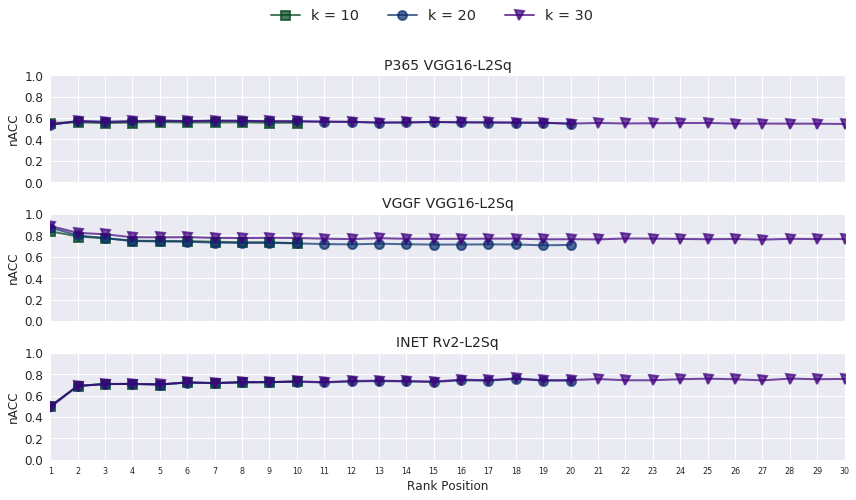

In [11]:
fig, axes = plt.subplots(3, 1, sharey=True, sharex=True)
axes = axes.reshape(-1)
#axes = [axes]
fig.set_size_inches((12, 7))

for i, key in enumerate(keys):
    axes[i].set_title("{0:s}".format(aliases[key]),
                      fontdict=titleargs)
    
    
    if i == 2:
        xl = 'Rank Position'
    else:
        xl = None
    h10, l10 = irp_results_pos_draw(evaluators_k10[key].data, 10, ax=axes[i], measure = 'NACC', ylabel='nACC', xlabel=xl)
    h20, l20 = irp_results_pos_draw(evaluators_k20[key].data, 20, ax=axes[i], measure = 'NACC', ylabel='nACC', xlabel=xl)
    h30, l30 = irp_results_pos_draw(evaluators_k30[key].data, 30, ax=axes[i], measure = 'NACC', ylabel='nACC', xlabel=xl)
    
    if i == len(keys)-1:
        fig.legend(h10 + h20 + h30, l10 + l20 + l30, fancybox=True, shadow=True, loc='upper center', 
                   bbox_to_anchor=[0.5, 1.0], ncol=3, fontsize='x-large')
        

fig.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('/home/alberto/Dropbox/2018-Elsevier-JVCI-Weibull Relevance Prediction/major/figures/JVCI_2018_Pos-NACC_vark.pdf')

## MCC

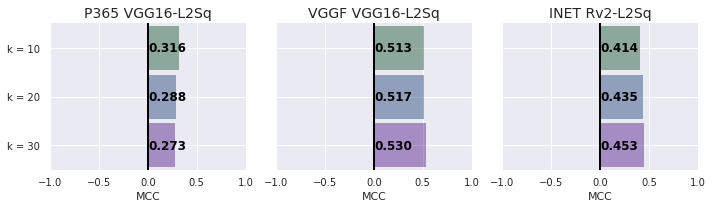

In [12]:
fig, axes = plt.subplots(1, 3, sharey=True, sharex=True)
axes = axes.reshape(-1)
# axes = [axes]
fig.set_size_inches((10, 3))

for i, key in enumerate(keys):
    axes[i].set_title("{0:s}".format(aliases[key]),
                      fontdict=titleargs)
    
    data = [evaluators_k10[key].data[0], evaluators_k20[key].data[0], evaluators_k30[key].data[0]]
    if i >= 0: 
        xl='MCC'
    else:
        xl=None
    irp_results_barh_draw(data, 'MCC', ax=axes[i], xlabel=xl)
    
fig.tight_layout()

plt.savefig('/home/alberto/Dropbox/2018-Elsevier-JVCI-Weibull Relevance Prediction/major/figures/JVCI_2018_MCC_vark.pdf')